In [1]:
# Testing configuration of upper interface of SAMs with different OH- headgroups percentages
# (polarities). The surface is configured as a grid of atoms (C and O)
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
########################### SET PARAMETERS FOR THE SIZE ###############################
xcopies = 1
ycopies = 1

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

Nx = Nx*xcopies # number of gridpoints in x-direction (carbons)
Ny = Ny*ycopies # number of gridpoints in y-direction (carbons)

a0 = 5.0 # set lattice vector length

In [3]:

########################### FUNCTION SET ALL PARTICLE TYPES TO 'C' ###############################

def C_restart(Nx,Ny):
    pType = np.zeros([Nx,Ny],dtype=str) # particle type

    # set standard particle type as Carbon
    for i in range(Nx):
        for j in range(Ny):
            pType[i,j] = 'C'
    return pType

In [4]:
########################### FUNCTION TO CREATE GRID ###########################
def creategrid(a0):
    # set particle x- and y- coordinates
    # !!!! later move to create_top_surface.ipynb !!!


    # First basis vector V = (Vx,Vy)
    Vx = a0
    Vy = 0
    # Second basis vector W = (Wx,Wy) 
    Wx = a0*np.sin(np.pi/6)
    Wy = a0*np.cos(np.pi/6)

    # create arrays that hold particle positions
    xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
    yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
    zlastPos = np.zeros([Nx,Ny],dtype=float) # zlastPos ONLY will serve to calculate the box height (z)
    
    ########################### TYPE 1 OF GRID #############################################

    for j in range(Ny):
        for i in range(Nx):
            xPos[i,j] = i*Vx + j*Wx
            yPos[i,j] = i*Vy + j*Wy 
            
    #for j in range(1,Ny):
        #for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape
            #if xPos[i,j]>xPos[-1,1]:
                #xPos[i,j] = xPos[i-Nx+1,j-2]

    return xPos, yPos, zlastPos

In [5]:
################################## FUNCTION TO PLOT HEAT MAP  ######################################
def plotheat(pType, pc):
    # HEATMAP
    #   create array with 0s where there is O
    #   and ones where there is C:
    Z = np.zeros([Nx,Ny],dtype=int)
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'C':
                Z[i,j] = 1
    
    # plot the heatmap
    fig, ax = plt.subplots()
    ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
    fig.savefig('s_' + str(pc) + '_heatmap.pdf',format='pdf')
 

In [46]:
################################## FUNCTION TO PLOT GRID  ######################################
def plotgrid(pType, a0, pc, text):
    
    xPos, yPos, zlastPos = creategrid(a0)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='yellow')
    #text = '%, Grid '+ str(Nx)+'x'+str(Ny)
    text = 'k= ',k,'l= ',l
    plt.title("Percentage = " + str(int(pc*100))+text, fontsize= 14)
    plt.grid()
    plt.show()
    fig.savefig('s_' + str(pc) + '_grid.pdf',format='pdf')
 

In [17]:
def loop1(xinterval,yinterval, Nx, Ny):
    pType = C_restart(Nx,Ny)

    n_oxys = 0
    for k in range(0,Nx,yinterval*2):
        for l in range(0,Ny,xinterval*2):
            pType[k,l] = 'O' 
            n_oxys = n_oxys + 1
    for k in range(yinterval,Nx,xinterval*2):
        for l in range(xinterval,Ny,xinterval*2):
            pType[k,l] = 'O' 
            n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc, k, l

def loop2(xinterval,yinterval, Nx, Ny):
    pType = C_restart(Nx,Ny)
    n_oxys = 0
    for l in range(0,Ny,yinterval):
        for k in range(0,Nx,xinterval-1):
            pType[k,l] = 'O' 
            n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc, k, l

def loop3(xinterval,yinterval, Nx, Ny):
    pType = C_restart(Nx,Ny)
    n_oxys =0
    for l in range(0,Ny,yinterval):
        for k in range(0,Nx,xinterval):
            pType[k,l] = 'O' 
            n_oxys = n_oxys +1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc, k, l

In [18]:

########################### EXCHANGE CARBONS WITH OXYGENS #############################

loop1, xinterval=  1 yinterval=  1
THIS IS A GRID


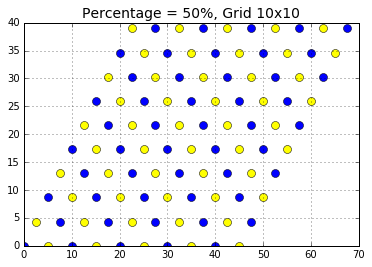

loop1, xinterval=  1 yinterval=  2
THIS IS A GRID


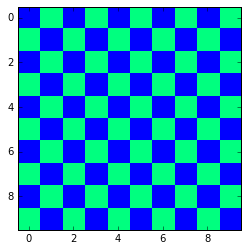

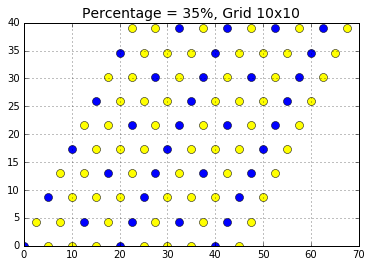

loop1, xinterval=  1 yinterval=  3
THIS IS A GRID


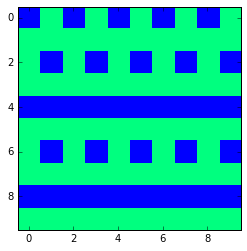

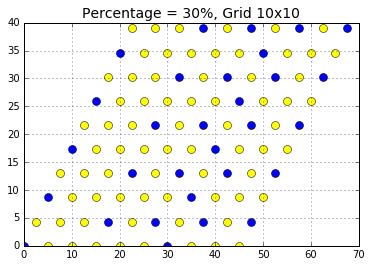

loop1, xinterval=  1 yinterval=  4
THIS IS A GRID


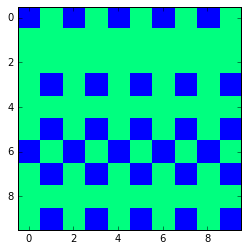

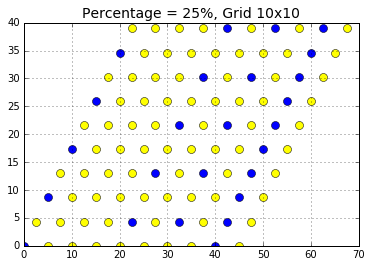

loop1, xinterval=  2 yinterval=  1
THIS IS A GRID


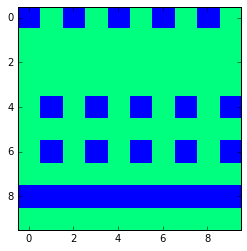

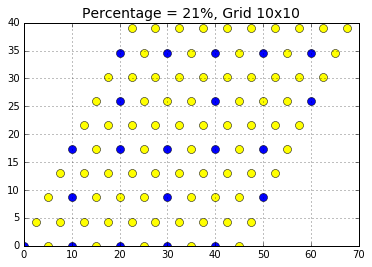

loop1, xinterval=  2 yinterval=  2
THIS IS A GRID


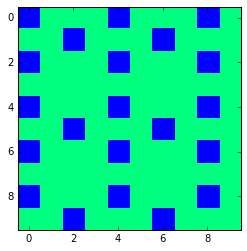

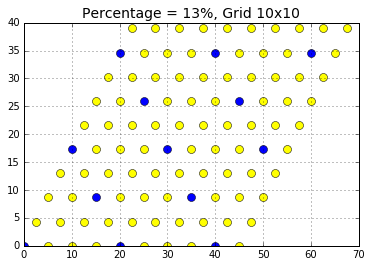

loop1, xinterval=  2 yinterval=  3
THIS IS A GRID


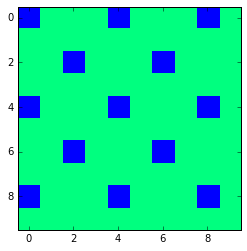

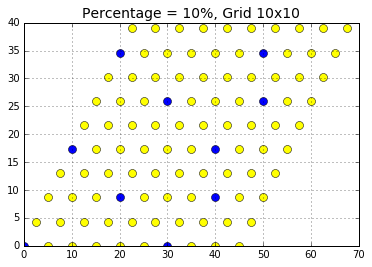

loop1, xinterval=  2 yinterval=  4
THIS IS A GRID


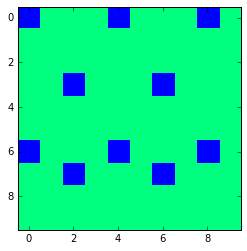

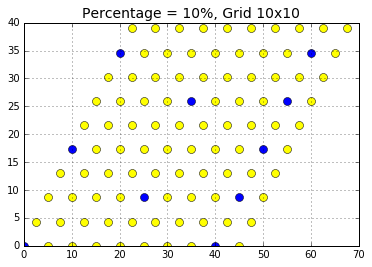

loop1, xinterval=  3 yinterval=  1
THIS IS A GRID


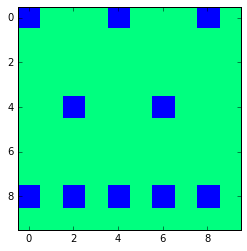

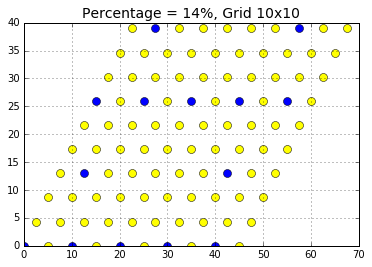

loop1, xinterval=  3 yinterval=  2
THIS IS A GRID


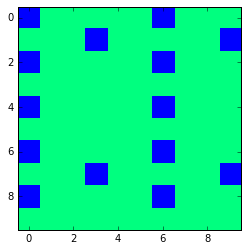

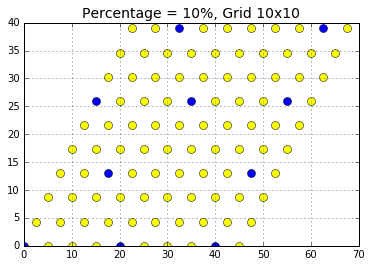

loop1, xinterval=  3 yinterval=  3
THIS IS A GRID


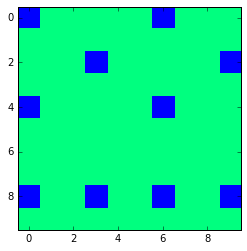

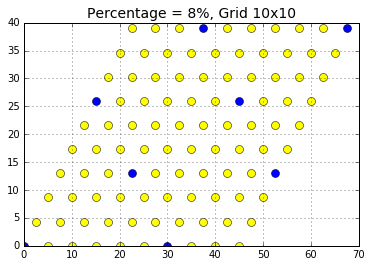

loop1, xinterval=  3 yinterval=  4
THIS IS A GRID


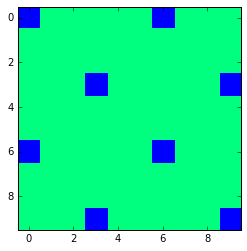

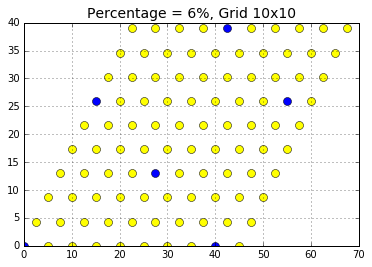

loop1, xinterval=  4 yinterval=  1
THIS IS A GRID


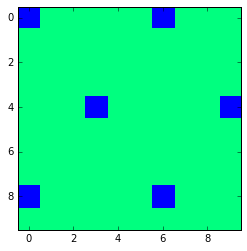

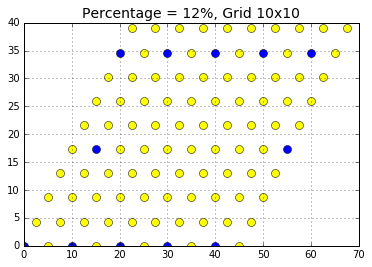

loop1, xinterval=  4 yinterval=  2
THIS IS A GRID


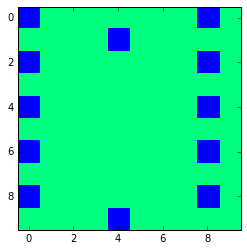

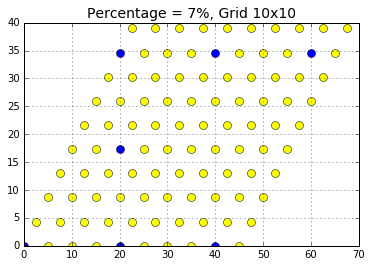

loop1, xinterval=  4 yinterval=  3
THIS IS A GRID


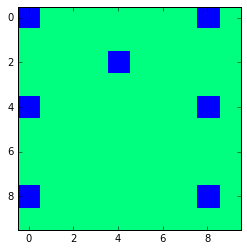

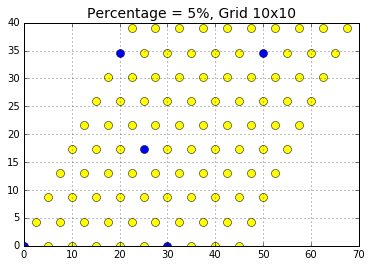

loop1, xinterval=  4 yinterval=  4
THIS IS A GRID


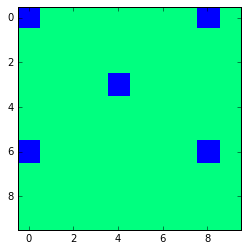

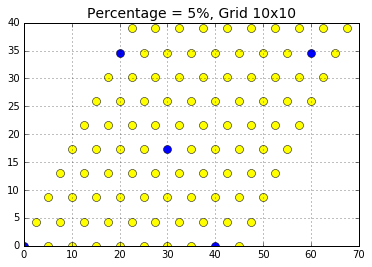

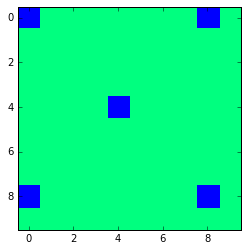

In [19]:
#path = "/Users/eixeres/Desktop/loop1/"
path = "/Users/burbol2/Desktop/PlotsLoops/loop1/"
os.chdir(path)
for xinterval in range(1,5):
    for yinterval in range(1,5):            
        pType, pc = loop1(xinterval,yinterval, Nx, Ny)
        print "loop1, xinterval= ", xinterval, "yinterval= ", yinterval
        plotgrid(pType, a0, pc)
        plotheat(pType, pc)

loop2, xinterval=  2 yinterval=  2


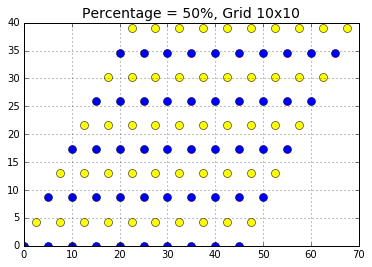

loop2, xinterval=  2 yinterval=  3


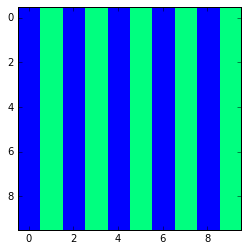

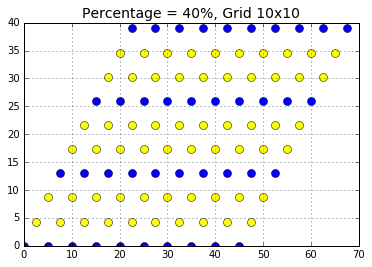

loop2, xinterval=  2 yinterval=  4


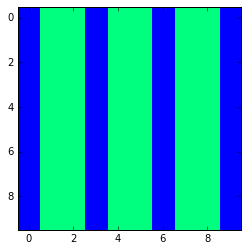

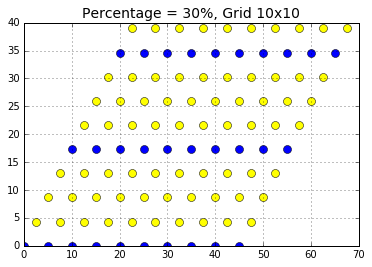

loop2, xinterval=  3 yinterval=  2


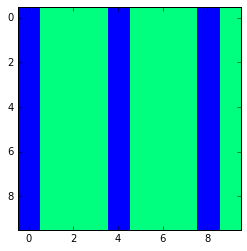

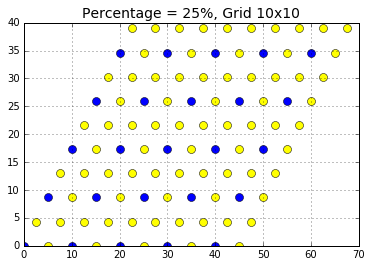

loop2, xinterval=  3 yinterval=  3


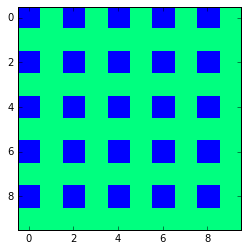

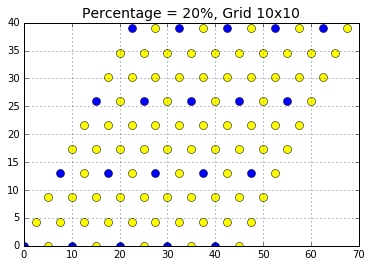

loop2, xinterval=  3 yinterval=  4


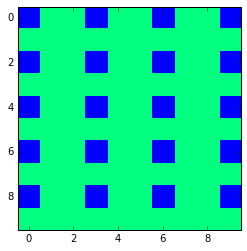

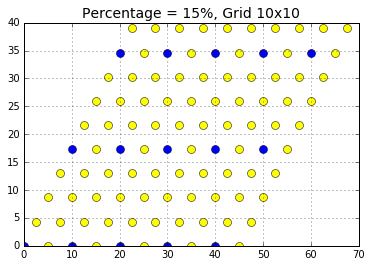

loop2, xinterval=  4 yinterval=  2


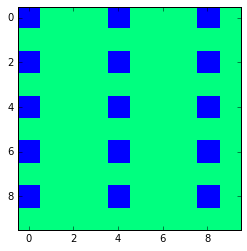

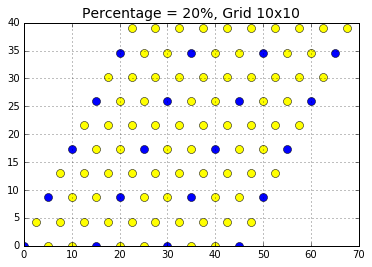

loop2, xinterval=  4 yinterval=  3


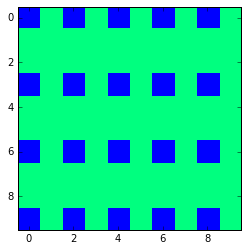

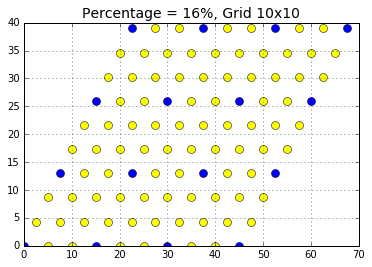

loop2, xinterval=  4 yinterval=  4


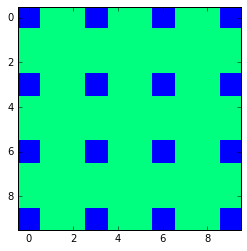

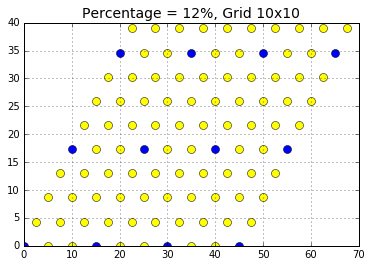

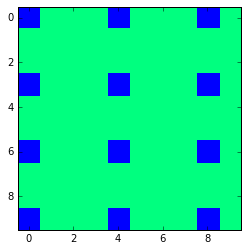

In [15]:
#path = "/Users/eixeres/Desktop/loop2/"
path = "/Users/burbol2/Desktop/PlotsLoops/loop2/"
os.chdir(path)
for xinterval in range(2,5):
    for yinterval in range(2,5):
        pType, pc = loop2(xinterval,yinterval, Nx, Ny)
        print "loop2, xinterval= ", xinterval, "yinterval= ", yinterval
        plotgrid(pType, a0, pc)
        plotheat(pType, pc)

loop3, xinterval=  1 yinterval=  1


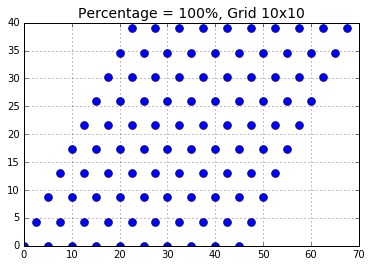

loop3, xinterval=  1 yinterval=  2


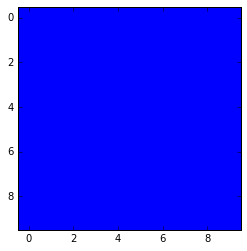

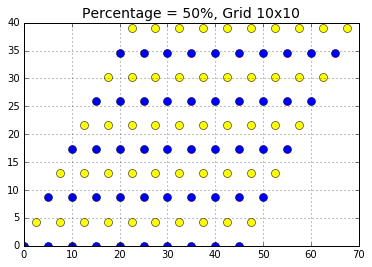

loop3, xinterval=  1 yinterval=  3


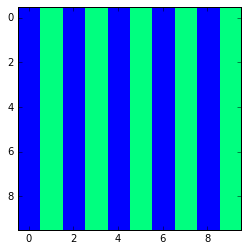

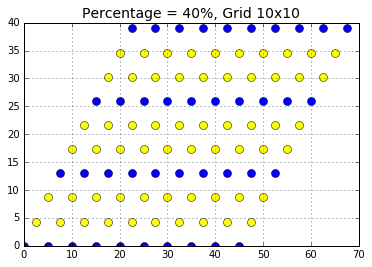

loop3, xinterval=  1 yinterval=  4


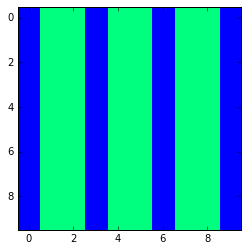

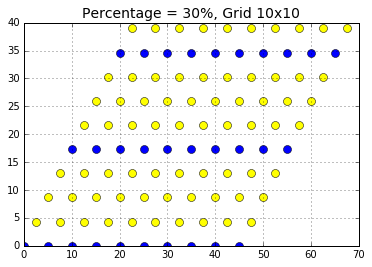

loop3, xinterval=  2 yinterval=  1


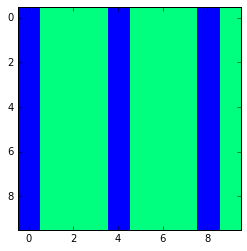

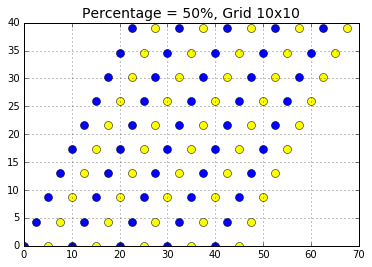

loop3, xinterval=  2 yinterval=  2


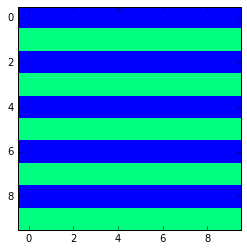

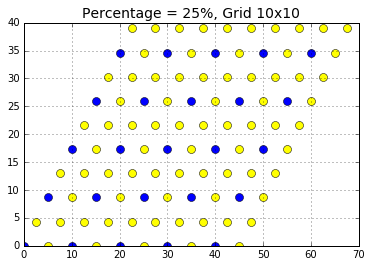

loop3, xinterval=  2 yinterval=  3


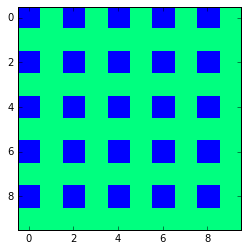

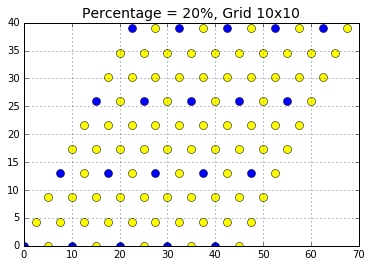

loop3, xinterval=  2 yinterval=  4


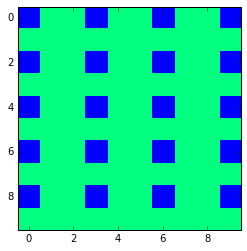

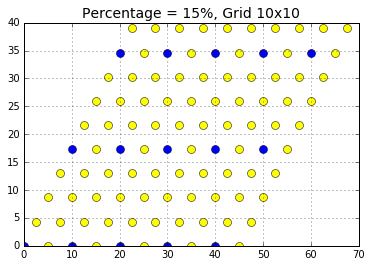

loop3, xinterval=  3 yinterval=  1


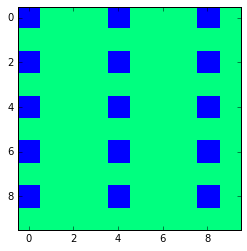

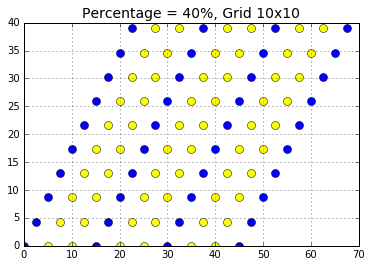

loop3, xinterval=  3 yinterval=  2


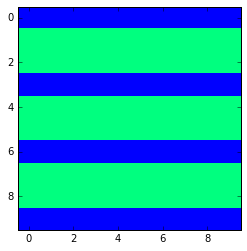

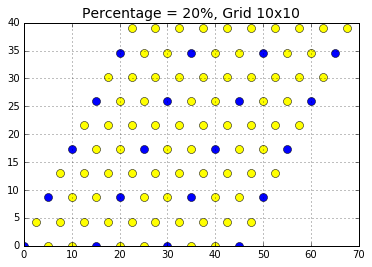

loop3, xinterval=  3 yinterval=  3


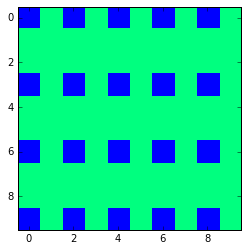

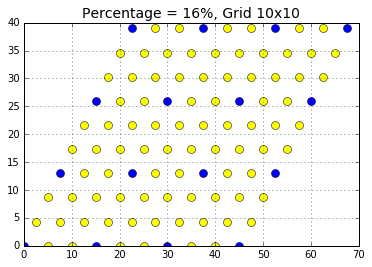

loop3, xinterval=  3 yinterval=  4


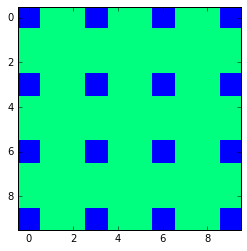

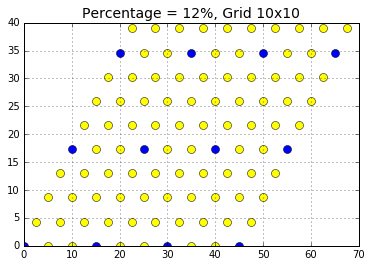

loop3, xinterval=  4 yinterval=  1


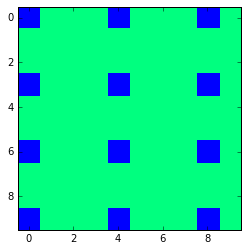

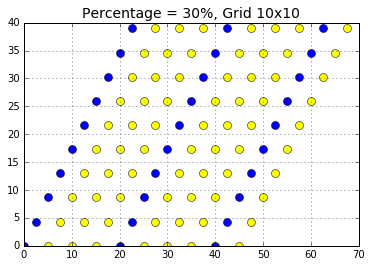

loop3, xinterval=  4 yinterval=  2


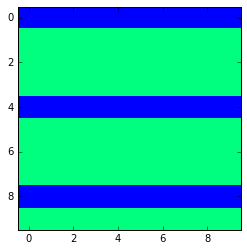

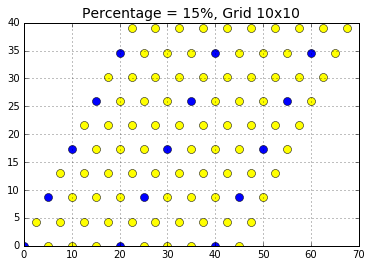

loop3, xinterval=  4 yinterval=  3


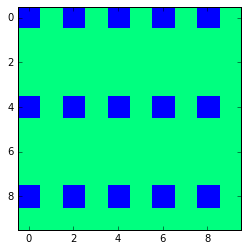

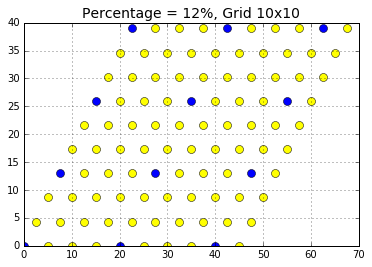

loop3, xinterval=  4 yinterval=  4


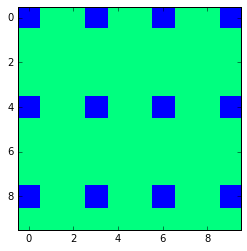

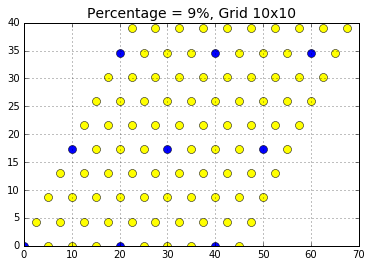

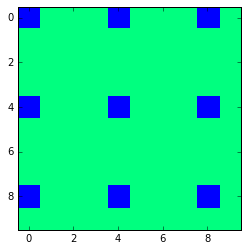

In [13]:
#path = "/Users/eixeres/Desktop/loop3/"
path = "/Users/burbol2/Desktop/PlotsLoops/loop3/"
os.chdir(path)
for xinterval in range(1,5):
    for yinterval in range(1,5):
        print "loop3, xinterval= ", xinterval, "yinterval= ", yinterval
        pType, pc = loop3(xinterval,yinterval, Nx, Ny)
        plotgrid(pType, a0, pc)
        plotheat(pType, pc)

THIS IS A GRID


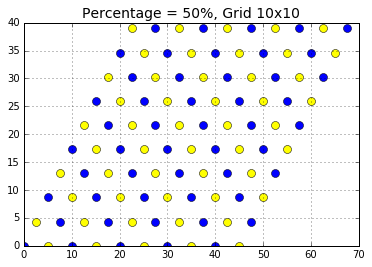

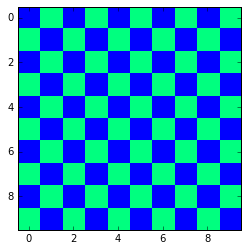

In [26]:
########################### TYPE 1 OF LOOP #############################################

pc = 8 # Good!
xinterval = 3
yinterval = 3

pc = 14 #(not evenly distributed)
xinterval = 3
yinterval = 1

pc = 10 #(not evenly distributed)
xinterval = 3
yinterval = 2

pc = 21 # Old SAM distribution
xinterval = 2
yinterval = 1

pc = 35 #(not evenly distributed)
xinterval = 1
yinterval = 2

pc=  13 #Good!
xinterval = 2
yinterval = 2

pc = 50 # not evenly distributed!
xinterval = 1
yinterval = 1

pType = C_restart(Nx,Ny)
n_oxys = 0
for k in range(0,Nx,yinterval*2):
    for l in range(0,Ny,xinterval*2):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
for k in range(yinterval,Nx,xinterval*2):
    for l in range(xinterval,Ny,xinterval*2):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
plotgrid(pType, a0, pc)

plotheat(pType, a0)

THIS IS A GRID


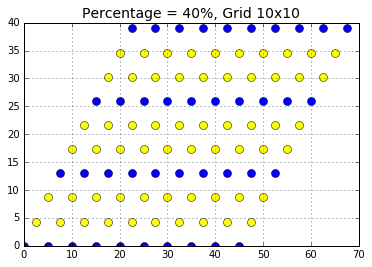

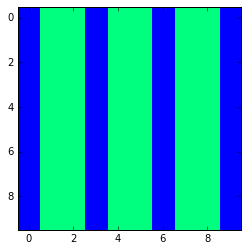

In [27]:
########################### TYPE 2 OF LOOP #############################################
        
pc = 20 #Good!
xinterval = 3
yinterval = 3

pc = 25 #Good!
xinterval = 3
yinterval = 2

pc = 15 #atoms distributed in lines
xinterval = 3
yinterval = 4

pc = 12 #(not evenly distributed)
xinterval = 4
yinterval = 4

pc = 50 #not evenly distributed!
xinterval = 2
yinterval = 2

pc = 100
xinterval = 2
yinterval = 1

pc = 50 #not evenly distributed!
xinterval = 3
yinterval = 1

pc = 50 #not evenly distributed!
xinterval = 2
yinterval = 3

pType = C_restart(Nx,Ny)
n_oxys = 0
for l in range(0,Ny,yinterval):
    for k in range(0,Nx,xinterval-1):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
plotgrid(pType, a0, pc)

plotheat(pType, a0)

THIS IS A GRID


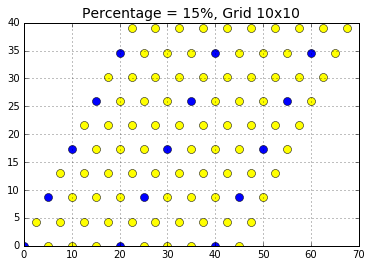

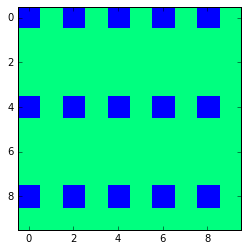

In [28]:
########################### TYPE 3 OF LOOP (NEW) #######################################

pc = 20 #Good!
xinterval = 2
yinterval = 3

pc = 25 # Good!
xinterval = 2
yinterval = 2

pc = 40 # not evenly distributed!
xinterval = 3
yinterval = 1

pc = 30 # not evenly distributed!
xinterval = 4
yinterval = 1

pc = 20 # not evenly distributed!
xinterval = 3
yinterval = 2

pc = 16 # not evenly distributed!
xinterval = 3
yinterval = 3

pc = 15 # not evenly distributed!
xinterval = 4
yinterval = 2


# exchange Carbons with oxygens
pType = C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny,yinterval):
    for k in range(0,Nx,xinterval):
        pType[k,l] = 'O' 
        n_oxys = n_oxys +1
        
pc = float(n_oxys)/float(Nx*Ny)
plotgrid(pType, a0, pc)

plotheat(pType, a0)

In [29]:
######################## Automactic Distance ###############################

In [30]:
Nxoxy = 2 # number of oxygens in x-direction 
Nyoxy = 2 # number of oxygens in y-direction 

# exchange particles (oxygens for carbons)
#    Get indices of particles to replace:
xincrement = Nx/Nxoxy
yincrement = Ny/Nyoxy
print "xincrement= ", xincrement, "yincrement= ", yincrement
pType_boolean = np.ones([Nx,Ny],dtype=int) # array with 0 for oxygen and 1 for carbon (for plotting)
n_oxys =0
pType = C_restart(Nx,Ny)
for k in range(0,Nx,xincrement):
    for l in range(0,Ny,yincrement):
        pType[k,l] = 'O'
        pType_boolean[k,l] = 0
        n_oxys = n_oxys +1
pc = float(n_oxys)/float(Nx*Ny)

xincrement=  5 yincrement=  5


THIS IS A GRID


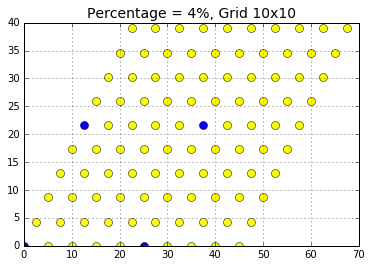

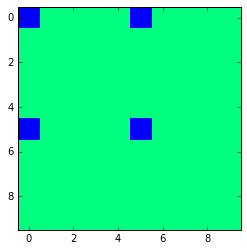

In [32]:
#path = "/Users/eixeres/Desktop/LoopAutomatic/"
path = "/Users/burbol2/Desktop/PlotsLoops/LoopAutomatic/"
os.chdir(path)
plotgrid(pType, a0, pc)
plotheat(pType, pc)

line1 0 0
line1 3 0
line1 6 0
line1 9 0
line1 0 3
line1 3 3
line1 6 3
line1 9 3
line1 0 6
line1 3 6
line1 6 6
line1 9 6
line1 0 9
line1 3 9
line1 6 9
line1 9 9
line2 1 1
line2 4 1
line2 7 1
line2 1 4
line2 4 4
line2 7 4
line2 1 7
line2 4 7
line2 7 7
line3 2 2
line3 5 2
line3 8 2
line3 2 5
line3 5 5
line3 8 5
line3 2 8
line3 5 8
line3 8 8
THIS IS A GRID


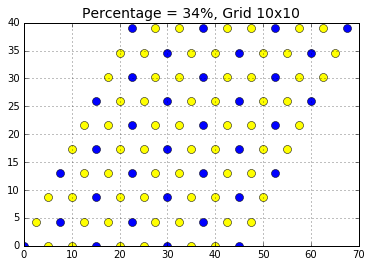

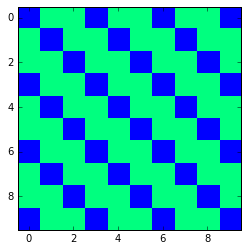

In [35]:
########################### TYPE 4 OF LOOP (NEW++) #######################################
#path = "/Users/eixeres/Desktop/loop4/"
path = "/Users/burbol2/Desktop/PlotsLoops/loop4/"
os.chdir(path)

pc = 34 # Good!
xintervalA = 3
yintervalA = 3
xintervalB = 3
yintervalB = 3
xintervalC = 3
yintervalC = 3

pType = C_restart(Nx,Ny)
n_oxys = 0
for l in range(0,Ny,yintervalA):
    for k in range(0,Nx,xintervalA):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line1',k, l
for l in range(1,Ny,yintervalB):
    for k in range(1,Nx,xintervalB):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line2',k, l
        
for l in range(2,Ny,yintervalC):
    for k in range(2,Nx,xintervalC):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line3',k, l

pc = float(n_oxys)/float(Nx*Ny)
plotgrid(pType, a0, pc)
plotheat(pType, pc)

line1 0 0
line1 4 0
line1 8 0
line1 0 2
line1 4 2
line1 8 2
line1 0 4
line1 4 4
line1 8 4
line1 0 6
line1 4 6
line1 8 6
line1 0 8
line1 4 8
line1 8 8
line2 2 1
line2 6 1
line2 2 3
line2 6 3
line2 2 5
line2 6 5
line2 2 7
line2 6 7
line2 2 9
line2 6 9
THIS IS A GRID


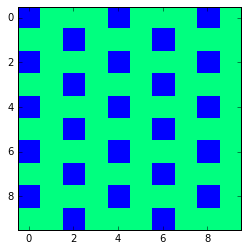

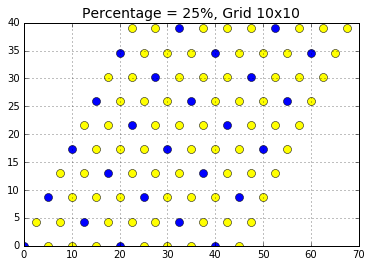

In [39]:
########################### TYPE 5 OF LOOP (NEW++) #######################################
pc = 25 # Good!
xintervalA = 4
xintervalB = 4

yintervalB = 2
yintervalA = 2

pType = C_restart(Nx,Ny)
n_oxys = 0
for l in range(0,Ny,yintervalA):
    for k in range(0,Nx,xintervalA):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line1',k, l
for l in range(1,Ny,yintervalB):
    for k in range(2,Nx,xintervalB):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line2',k, l

pc = float(n_oxys)/float(Nx*Ny)
plotheat(pType.T, pc)
plotgrid(pType, a0, pc)

line1 0 0
line1 3 0
line1 6 0
line1 9 0
line1 0 2
line1 3 2
line1 6 2
line1 9 2
line1 0 4
line1 3 4
line1 6 4
line1 9 4
line1 0 6
line1 3 6
line1 6 6
line1 9 6
line1 0 8
line1 3 8
line1 6 8
line1 9 8
line2 2 1
line2 5 1
line2 8 1
line2 2 3
line2 5 3
line2 8 3
line2 2 5
line2 5 5
line2 8 5
line2 2 7
line2 5 7
line2 8 7
line2 2 9
line2 5 9
line2 8 9
THIS IS A GRID


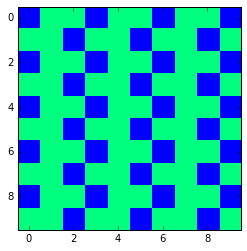

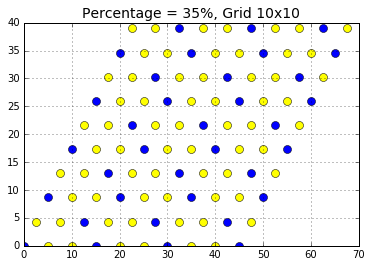

In [40]:
########################### TYPE 5 OF LOOP (NEW++) #######################################
#path = "/Users/eixeres/Desktop/loop5/"
path = "/Users/burbol2/Desktop/PlotsLoops/loop4/"
os.chdir(path)
pc = 625 # 
xintervalA = 3
xintervalB = 3

yintervalA = 2
yintervalB = 2


pType = C_restart(Nx,Ny)
n_oxys = 0
for l in range(0,Ny,yintervalA):
    for k in range(0,Nx,xintervalA):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line1',k, l
for l in range(1,Ny,yintervalB):
    for k in range(2,Nx,xintervalB):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
        print 'line2',k, l

pc = float(n_oxys)/float(Nx*Ny)
plotheat(pType.T, pc)
plotgrid(pType, a0, pc)

0 0
3 0
6 0
9 0
0 2
3 2
6 2
9 2
0 2
3 2
6 2
9 2
0 4
3 4
6 4
9 4
0 4
3 4
6 4
9 4
0 6
3 6
6 6
9 6
0 6
3 6
6 6
9 6
0 8
3 8
6 8
9 8
0 8
3 8
6 8
9 8
THIS IS A GRID


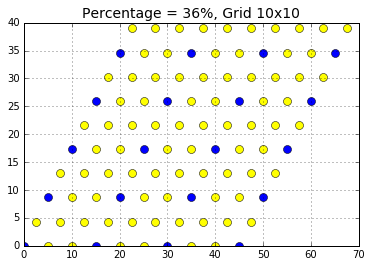

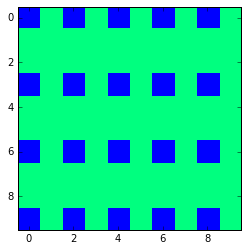

In [44]:
# Testing (looking for 40%)

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

#path = "/Users/eixeres/Desktop/loopTesting/"
path = "/Users/burbol2/Desktop/PlotsLoops/loopTesting/"
os.chdir(path)
xinterval = 3
yinterval = 1         

pType = C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny-1,yinterval):
    for k in range(0,Nx,xinterval):
        pType[k,l+l%2] = 'O'
        print k, l+l%2
        n_oxys = n_oxys +1
pc = float(n_oxys)/float(Nx*Ny)

plotgrid(pType, a0, pc)
plotheat(pType, pc)

0 0
2 0
4 0
6 0
8 0
0 2
2 2
4 2
6 2
8 2
0 2
2 2
4 2
6 2
8 2
0 4
2 4
4 4
6 4
8 4
0 4
2 4
4 4
6 4
8 4
0 6
2 6
4 6
6 6
8 6
0 6
2 6
4 6
6 6
8 6
0 8
2 8
4 8
6 8
8 8
0 8
2 8
4 8
6 8
8 8
THIS IS A GRID


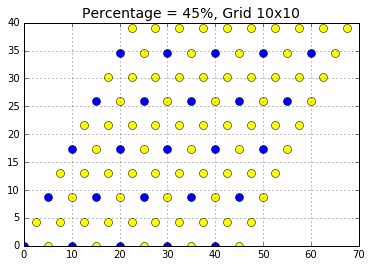

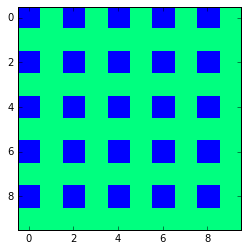

In [45]:
# Testing (looking for 40%)

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

#path = "/Users/eixeres/Desktop/loopTesting/"
path = "/Users/burbol2/Desktop/PlotsLoops/loopTesting/"
os.chdir(path)
xinterval = 2
yinterval = 1         

pType = C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny-1,yinterval):
    for k in range(0,Nx,xinterval):
        pType[k,l+l%2] = 'O'
        print k, l+l%2
        n_oxys = n_oxys +1
pc = float(n_oxys)/float(Nx*Ny)

plotgrid(pType, a0, pc)
plotheat(pType, pc)

In [42]:
3%2

1